In [4]:
from serpapi import GoogleSearch
from IPython.display import clear_output
from pprint import pprint

import pandas as pd
import os

# Data Extraction
This notebook servies as an introduction to SerpAPI, a versatile data collection algorithm. 
This notebook will take you through how to:
- Create a SerpAPI account
- Perform data collection
    - Introduce you to the different varieties of data collection

## SerpAPI Account
The selling point of SerpAPI is the simplified scraping of data from Google and other search engines, without concerns for potential scraping misshaps such as getting rejected from a website or stumbling onto personal data. 

The below steps will guide you through how to create a SerpAPI account and find your API key. 
**Note:*** Your API key is your personal identifier allowing you to securely connect to SerpAPI. Please never share this key with anyone as it will allow others to perform scraping on your account. 

The SerpAPI website can be found at: 

1. Select `Register` in the top-right corner of the screen
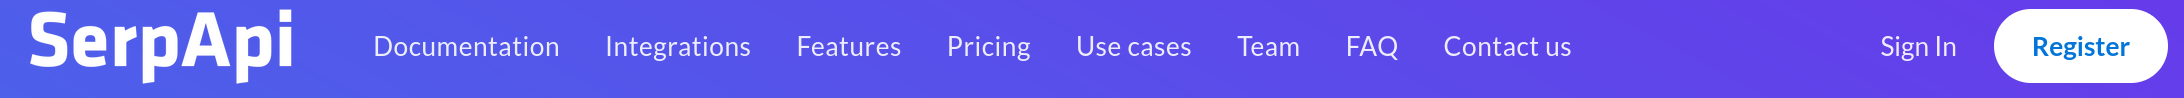 

2. Input your registration details into the Registration form: 
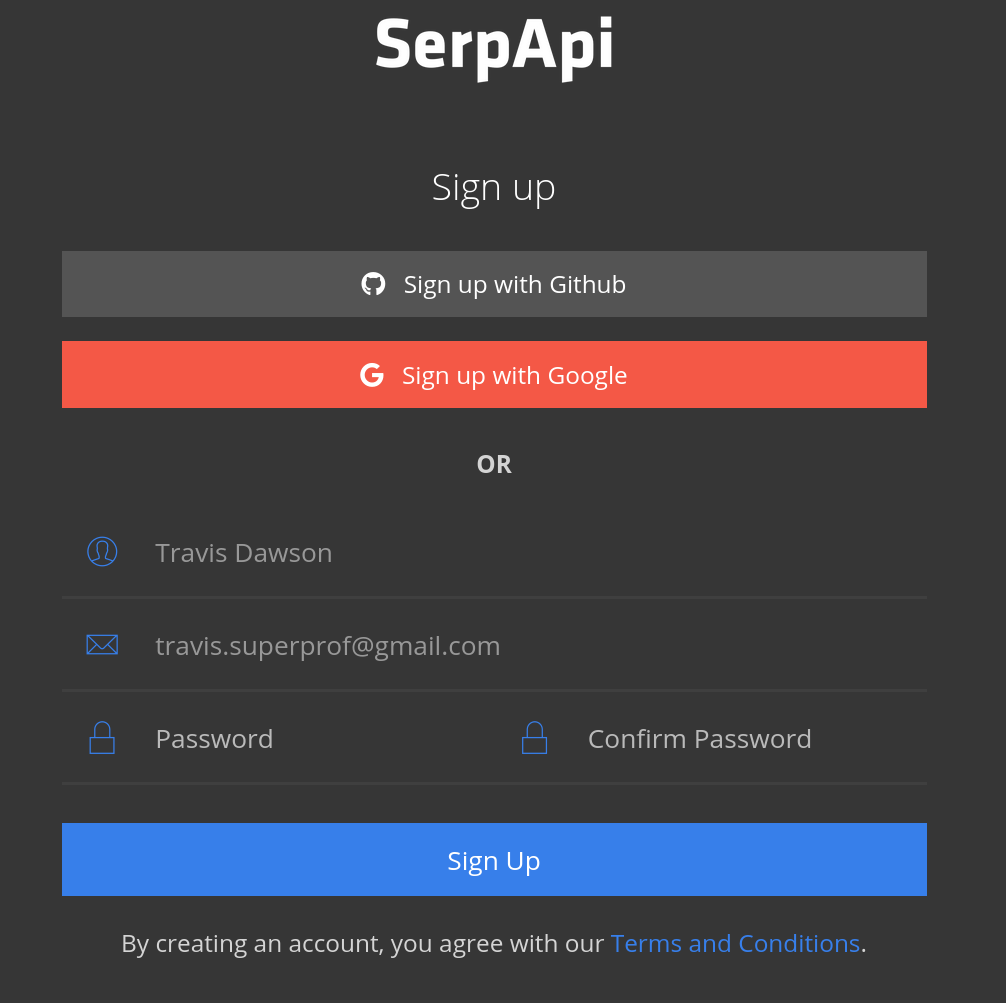

3. Verify both your email address and phone number
    **Note:** You cannot sign up for multiple accounts, SerpAPI has a good detection system for the same individual     signing up for multiple accounts. I believe it is linked to the IP address used.
    
4. Congratualtions you have created your account: 
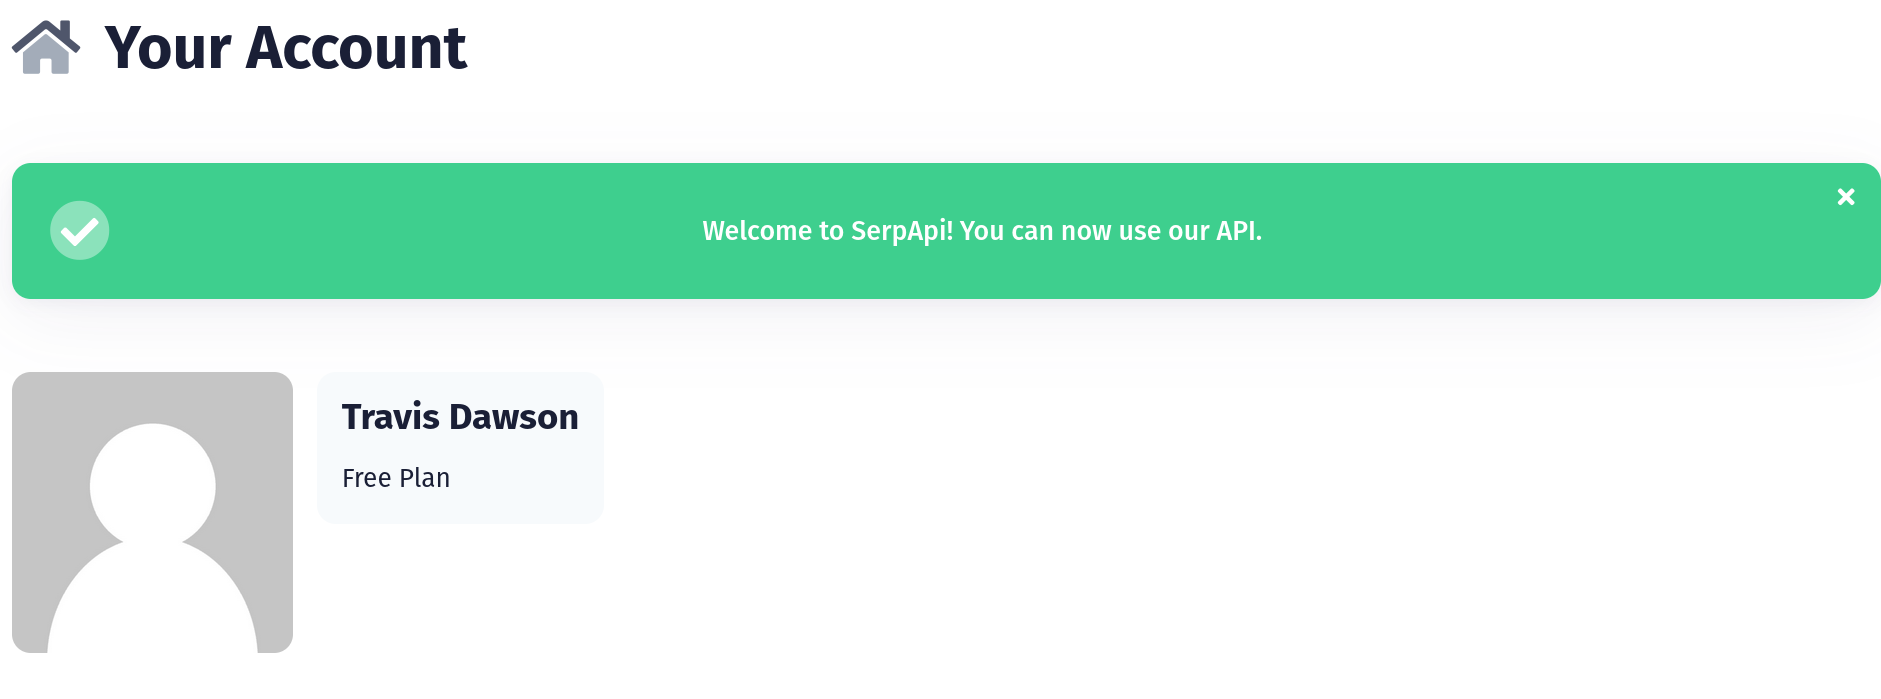

### Note
- This is a free account for non-commerical purposes. As a result, you have a limited number of scraping requests which are refilled monthly. Ensure everything is working as indented before running a scraping request. 

## Next Steps

SerpAPI allows for a vast amount of versatile data scraping. 
Visit their Playground whilst logged in and begin searching potential questions and queries that interest you. 
This is the best way to begin exploring the parameters that underly each set of data scraping. 
Please note that they offer multiple search engines, these determine the scope of your data scraping and their domain. The available search engines are as follows: 
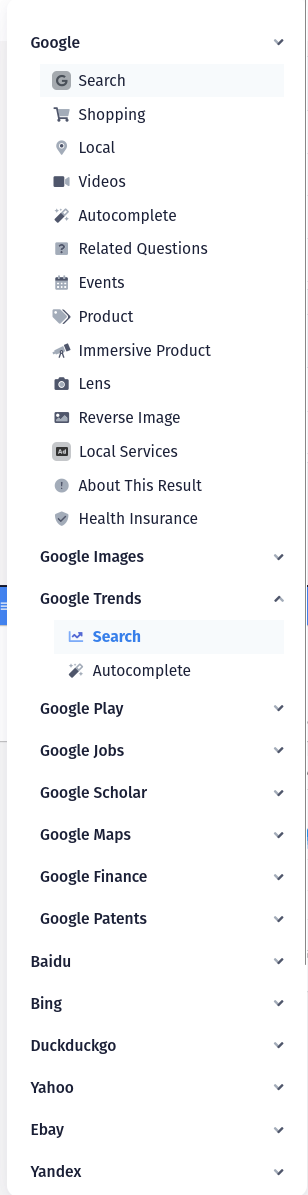

### Example
#### Search
**Determine the interest in Obesity over time**
- Location: Worldwide
- Data Type: Interest over time
- Date: 2005-10-15 2023-05-25

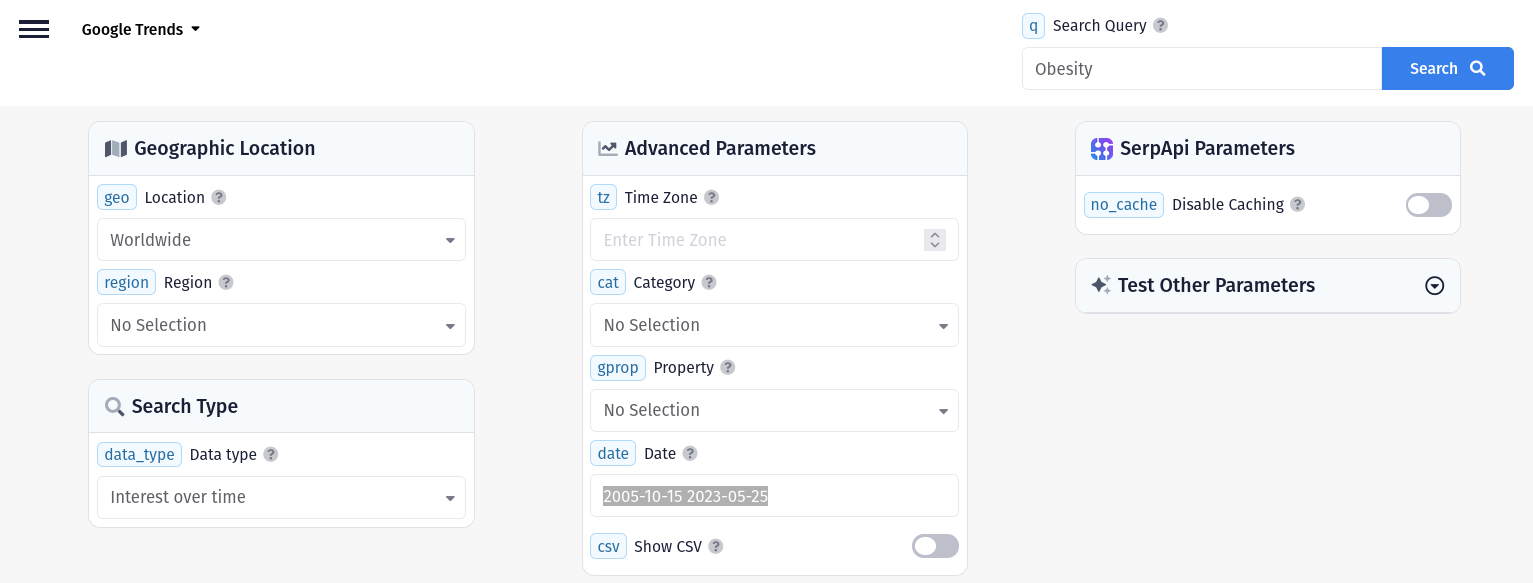

#### Results
##### Graph
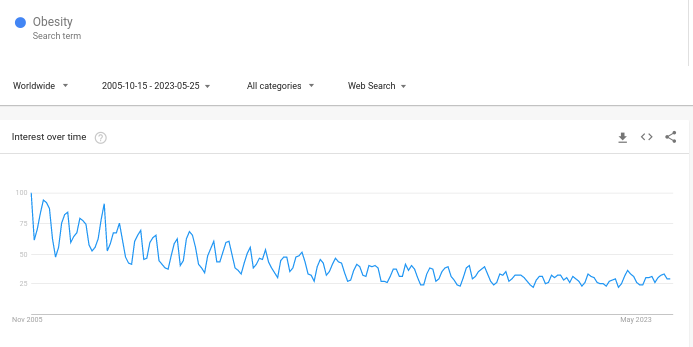

#### JSON
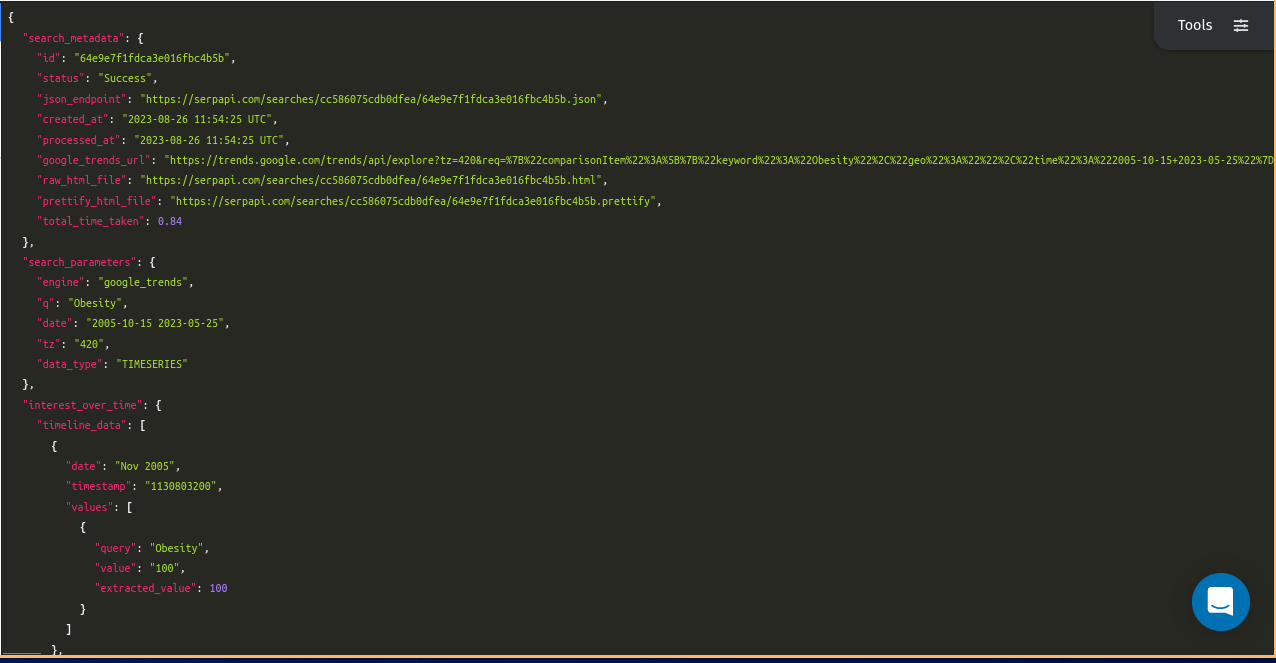

## Example of using Scraped Data from SerpAPI

A project was conducted to determine the in-demand skills within the Data Science Job market. As such the Google Jobs search engine was scraped and the data used to visualize and model the results. This project can serve as a sample, specifically the scripts used to collect and write data to a csv file. 

The project is available at: https://github.com/trav-d13/Data-Science-Job-Market-Analysis/tree/main
- The data collection script is awailable here: https://github.com/trav-d13/Data-Science-Job-Market-Analysis/blob/main/collection.ipynb
- The DataExtraction.py file is from where the functions used in `collection.ipynb` are from. Here is the link to the file: https://github.com/trav-d13/Data-Science-Job-Market-Analysis/blob/main/dataExtraction.py

For ease of use, I have created a working version of the `collection.ipynb`. 
You will need to specify the parameters of your scraping. 
The default search parameters are still set to the Data Science Job Market

The below example code is sourced from the project: https://github.com/trav-d13/Data-Science-Job-Market-Analysis/tree/main
Many thanks to the co-authors of the project [Leon Debnath](https://github.com/S010MON) and [Konstantin Sandfort](https://github.com/KSandfort)

In [6]:
# Essential Functions Required
def merge_highlights(highlights: list) -> list:
    """
    A function that takes a list of dictionaries and strings and merges
    them into a list of individual strings by extracting the values with
    'item' tags and ignoring 'title'
    """
    output = []
    for highlight in highlights:

        if type(highlight) is dict:
            output.extend(highlight['items'])

        elif type(highlight) is str:
            output.append(highlight)
    return output


def write_data(df: pd.DataFrame) -> None:
    """Wrtie collected data to a file called data.csv
    If the file already exists, the data will be appended to the existing file. 
    If the file does not exist, a new file with the data will be created. 
    """
    file_name = 'scraping_data/data.csv'
    data_exists = os.path.isfile(file_name)
    if data_exists:
        df.to_csv(file_name, mode='a', index=False, header=False)
    else:
        df.to_csv(file_name, mode='w', index=False, header=True)


def extract(json_response: dict) -> None:
    """
    Insert SerpAPI Google Jobs response directly in to extract
    data will be appended to 'data.csv' in the root folder.
    """
    df = pd.DataFrame.from_records(json_response["jobs_results"])
    df['location'] = df['location'].str.replace('\([^()]*\)', "", regex=True)   # Remove unnecessary bracket in Location
    df['via'] = df['via'].str.replace('via', '', regex=False)                   # Remove via keyword from vi
    df = df.replace(to_replace=r'\n\n|\n•|\n', value=' ', regex=True)           # Remove new line and other characters
    df.drop(columns=['thumbnail', 'extensions', 'related_links'],inplace=True)  # Remove columns from the dataframe
    df.job_highlights = df.job_highlights.apply(merge_highlights)               # Place dict/list of strings into a single list

    write_data(df)

The limit of the quantity of data scraped lies at approximately 100 pages. 
The below variables sets the parameters required to paginate (set individual pages of data) so that piece-wise collection can occur.
Please note, I have provided my API key, this is linked to a free account. Please use your own created Key. 
Your API Key is on your SerpAPI home page under the heading: 
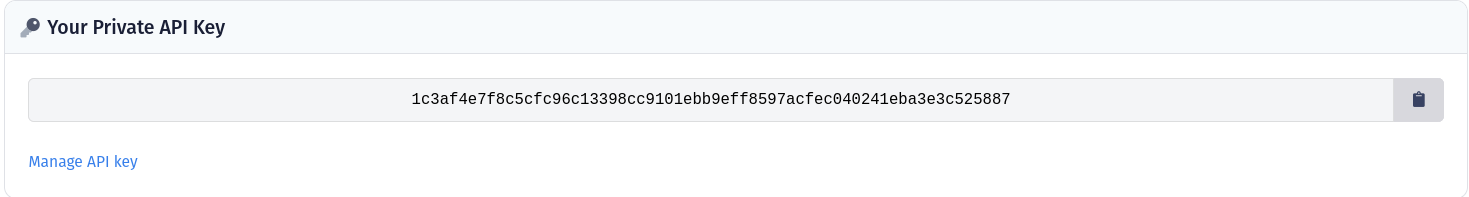

In [8]:
api_key = "1c3af4e7f8c5cfc96c13398cc9101ebb9eff8597acfec040241eba3e3c525887"
country = "ke" # https://serpapi.com/google-countries

start_page = 0                    # If you have conducted one search, but want to get more, set to last result 
number_of_searches = 30  # These parameters allow for pagination of the collected data
end_page = number_of_searches * 10

**Note**: If the scraping process does not terminate early (reaches 100%), then modify the start_page variable to begin where the previous search ended.

In [9]:
current_page = start_page

for i in range(start_page, end_page, 10):
    # Specify the parameters of your required scrape
    params = {
        "engine": "google_jobs",
        "q": "data scientist",
        "hl": "en",
        "api_key": api_key,
        "gl": country,
        "start": i 
    }

    search = GoogleSearch(params)
    results = search.get_dict()
    
    try:
        extract(results)
    except KeyError:
        pprint(results)
        break
    
    clear_output(wait=True)
    percent = int((i/end_page) * 100)
    current_page = i/10
    print(percent*'#', f" {percent}%")
    
print(f"{current_page - start_page} searches completed\n" +
f"country: {country}\n" +
f"start page: {start_page}\n" +
f"end page: {current_page}")



###  3%
https://serpapi.com/search
{'error': "Google hasn't returned any results for this query.",
 'search_information': {'jobs_results_state': 'Fully empty'},
 'search_metadata': {'created_at': '2023-08-26 14:29:08 UTC',
                     'google_jobs_url': 'https://www.google.com/search?q=data+scientist&ibp=htl;jobs&hl=en&gl=ke&start=20',
                     'id': '64ea0c341988e5d269ae05c0',
                     'json_endpoint': 'https://serpapi.com/searches/d4fb1762c1f478b2/64ea0c341988e5d269ae05c0.json',
                     'processed_at': '2023-08-26 14:29:08 UTC',
                     'raw_html_file': 'https://serpapi.com/searches/d4fb1762c1f478b2/64ea0c341988e5d269ae05c0.html',
                     'status': 'Success',
                     'total_time_taken': 0.13},
 'search_parameters': {'engine': 'google_jobs',
                       'gl': 'ke',
                       'google_domain': 'google.com',
                       'hl': 'en',
                       'q': 'data scie